***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***2019***


Credits: The data imports were extracted from https://keras.rstudio.com/articles/examples/mnist_cnn.html

***NOTE***

Be sure to use hardware acceleration to use the GPU. Click on `Runtime`, change `runtime type`, and select `GPU` for the *hardware accelerator* option.

In [1]:
devtools::install_github("rstudio/keras")

Skipping install of 'keras' from a github remote, the SHA1 (34dc89ed) has not changed since last install.
  Use `force = TRUE` to force installation


## Import the Keras library

In [0]:
library(keras)

## Load the MNIST dataset

In [0]:
mnist <- dataset_mnist()

## Load features

In [0]:
x_train <- mnist$train$x
x_test <- mnist$test$x


## Load targets

In [0]:
y_train <- mnist$train$y
y_test <- mnist$test$y

## Check dimension

In [6]:
dim(x_train)

[1] 60000    28    28

## Reshape

Keras wants the dimension for CNNs to be the following: [batches, width, height, channels] so we need to reshape the data by adding the channel dimension.

In [0]:
x_train <- array_reshape(x_train, c(nrow(x_train), 28, 28, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), 28, 28, 1))

## Take a look at a  training example

The dimension is correct but take a look at the values in the data point. The values are large, between 0 and 255. Thus we will need to normalise the values.

In [8]:
dim(x_train[1,,,])

[1] 28 28

In [9]:
print(x_train[1,,,1])

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [6,]    0    0    0    0    0    0    0    0    0     0     0     0     3
 [7,]    0    0    0    0    0    0    0    0   30    36    94   154   170
 [8,]    0    0    0    0    0    0    0   49  238   253   253   253   253
 [9,]    0    0    0    0    0    0    0   18  219   253   253   253   253
[10,]    0    0    0    0    0    0    0    0   80   156   107   253   253
[11,]    0    0    0    0    0    0    0    0    0    14     1   154   253
[12,]    0    0    0    0    0    0    0    0    0     0     0   139   253
[13,]    0    0    0    0

## Normalise

In [0]:
x_train <- x_train / 255
x_test <- x_test / 255

Now we can check the values. This looks better and is suitable for a CNN.

In [11]:
print(x_train[1,,,1])

      [,1] [,2] [,3] [,4]      [,5]      [,6]       [,7]       [,8]       [,9]
 [1,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000
 [2,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000
 [3,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000
 [4,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000
 [5,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000
 [6,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000
 [7,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.11764706
 [8,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.19215686 0.93333333
 [9,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.07058824 0.85882353
[10,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.31372549
[11,]    0    0    0    0 0.0000000 0.0000000 0.00000000 0.00000000 0.00000000
[12,]    0    0    0    0 0.0000000 0.0000000 0.0000

## Convert targets/labels to their one-hot encoded equivalent

In [0]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

## Create a model

We specify an input shape of `c(28, 28, 1)`.

The architecture is as follows: two convolutional layers, followed by max pooling and dropout, then a fully connected layer with dropout and finally the output fully connected layer. The last layer has 10 units (one for each digit 0 to 9). Note that between the max pooling layer and the first fully connected layer is the flattening operation `layer_flatten()`. This is how we go from convolutional based layers to fully connected ones.

In [0]:
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',input_shape = c(28,28,1)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>%  # We use the flatten function to go from the CNN structure to the MLP
  layer_dense(units = 128, activation = 'relu') %>% # the MLP starts here
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 10, activation = 'softmax')

## Compile the model

In [0]:
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = optimizer_adadelta(),
  metrics = c('accuracy')
)

## Allow printing to the screen

In [0]:
print_dot_callback <- callback_lambda(
  on_epoch_end = function(epoch, logs) {
    if (epoch %% 2 == 0) cat(epoch, '\n')
  }
)   

## Early stopping to avoid over-fitting

In [0]:
# The patience parameter is the amount of epochs to check for improvement.
early_stop <- callback_early_stopping(monitor = "val_loss", patience = 6)

## Train the model

In [17]:
history <- model %>% fit(
  x_train,
  y_train,
  epochs = 14,
  validation_split = 0.2,
  verbose = 0,
  batch_size = 128,
  callbacks = list(early_stop, print_dot_callback)
)

0 
2 
4 
6 
8 
10 
12 


### Plot the performance

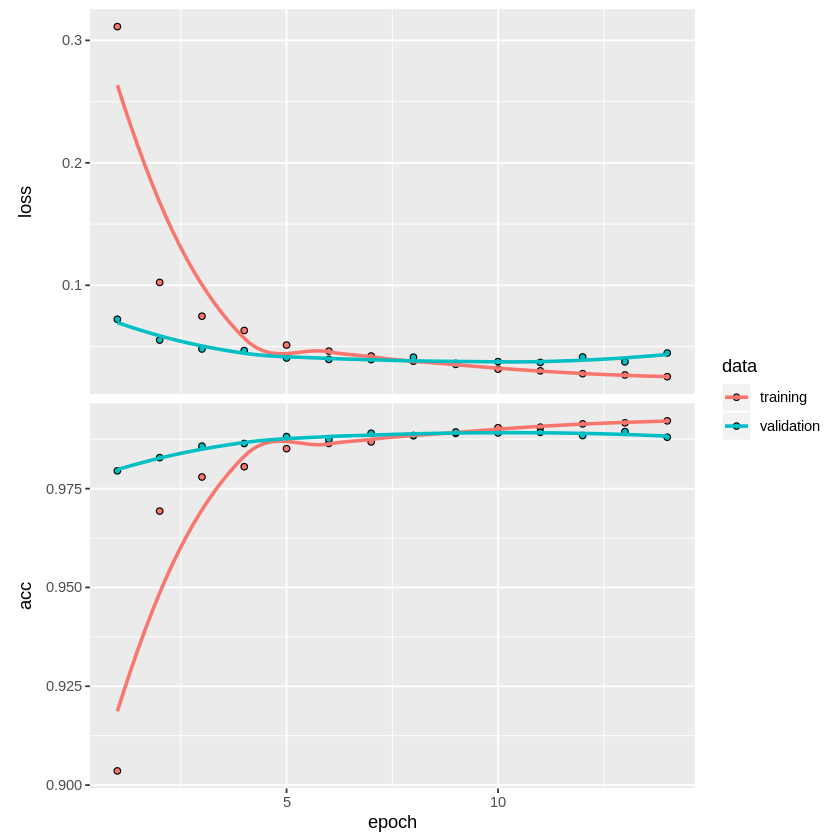

In [18]:
plot(history)

## Evaluate the performance

In [19]:
model %>% evaluate(x_test, y_test)

$loss
[1] 0.03411421

$acc
[1] 0.9895